In [2]:
import pandas as pd
test_df = pd.read_csv("MongoDB_70_Test_inference.csv")
test_df

,Unnamed: 0,text,label,pred
0,5273,since two weeks i have sometimes this message ...,1,0
1,6591,in wiki the links to issues in issue tracker a...,0,0
2,3706,when you select the root branch in the branch ...,0,0
3,893,entering more than characters in the applicati...,0,0
4,5937,trying to push to git i am getting this error ...,1,1
...,...,...,...,...
6528,5734,note this bug report is for confluence cloud u...,1,1
6529,5191,the updatingstatus action is vulnerable to sto...,1,1
6530,5390,hiwhile trying to push my commits to repo i am...,1,1
6531,860,users with no administrative permissions see a...,0,0


In [6]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(test_df["label"].values, test_df["pred"].values)

print(cf_matrix)

[[2094 1174]
 [ 795 2470]]


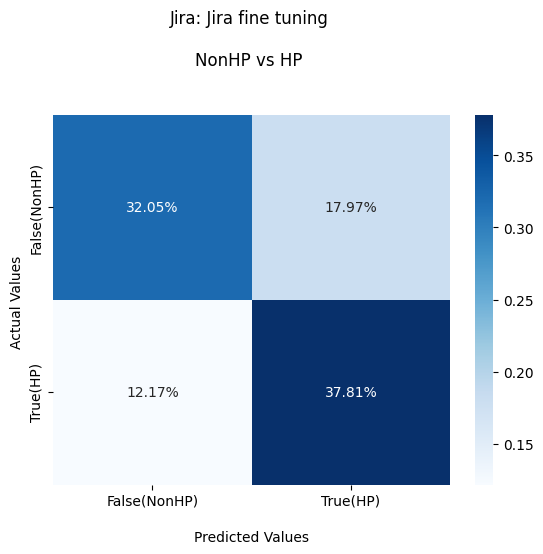

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Jira: Jira fine tuning \n\nNonHP vs HP \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False(NonHP)','True(HP)'])
ax.yaxis.set_ticklabels(['False(NonHP)','True(HP)'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [4]:
from sklearn.metrics import classification_report


print(classification_report(test_df["label"].values, test_df["pred"].values))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68      3268
           1       0.68      0.76      0.72      3265

    accuracy                           0.70      6533
   macro avg       0.70      0.70      0.70      6533
weighted avg       0.70      0.70      0.70      6533



In [3]:
from sklearn.metrics import matthews_corrcoef

# Calculate the Matthew's Correlation Coefficient
mcc = matthews_corrcoef(test_df["label"].values, test_df["pred"].values)
print("Matthew's Correlation Coefficient:", mcc)

Matthew's Correlation Coefficient: 0.39994703055167685
